### Problem Statement

ABC is an online content sharing platform that enables users to create, upload and share the content in the form of videos. It includes videos from different genres like entertainment, education, sports, technology and so on. The maximum duration of video is 10 minutes.

Users can like, comment and share the videos on the platform. 

Based on the user’s interaction with the videos, engagement score is assigned to the video with respect to each user. Engagement score defines how engaging the content of the video is. 

Understanding the engagement score of the video improves the user’s interaction with the platform. It defines the type of content that is appealing to the user and engages the larger audience.


### Objective
The main objective of the problem is to develop the machine learning approach to predict the engagement score of the video on the user level.

### Guidelines for Final Submission
Please ensure that your final submission includes the following:

Solution file containing the predictions for the row_id in the test set (Format is given in sample_submission.csv)
A zipped file containing code & approach (Note that both code and approach document are mandatory for shortlisting)
Code: Clean code with comments on each part
Approach: Please share your approach to solve the problem (doc/ppt/pdf format). It should cover the following topics:
A brief on the approach used to solve the problem.
Which Data-preprocessing / Feature Engineering ideas really worked? How did you discover them?
What does your final model look like? How did you reach it?

### Public and Private Split
Test data is further divided into Public (40%) and Private (60%) data.

Your initial responses will be checked and scored on the Public data.
The final rankings would be based on your private score which will be published once the competition is over.

# `Hackathon`

#### user_id
Unique identifier of the user

#### category_id
Category of the video

#### video_id
Unique identifier of the video

#### age
Age of the user

#### gender
Gender of the user (Male and Female)

#### profession
Profession of the user (Student, Working Professional, Other)

#### followers
No. of users following a particular category

#### views
Total views of the videos present in the particular category

#### engagement_score
Engagement score of the video for a user

In [503]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [504]:
train_data = pd.read_csv('train_0OECtn8.csv')
train_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [505]:
train_data.shape

(89197, 10)

In [506]:
train_data.isnull().sum()

row_id              0
user_id             0
category_id         0
video_id            0
age                 0
gender              0
profession          0
followers           0
views               0
engagement_score    0
dtype: int64

In [507]:
train_data.dtypes

row_id                int64
user_id               int64
category_id           int64
video_id              int64
age                   int64
gender               object
profession           object
followers             int64
views                 int64
engagement_score    float64
dtype: object

## `Univariate Analysis`

### `Gender`

In [508]:
train_data['gender'].value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

### `Profession`

In [509]:
train_data['profession'].value_counts()

Student                 44638
Other                   26840
Working Professional    17719
Name: profession, dtype: int64

### `Category Id`

In [510]:
len(train_data['category_id'].value_counts())

47

### `Videos ID`

In [511]:
len(train_data['video_id'].value_counts())

175

### `USer Id`

In [512]:
len(train_data['user_id'].value_counts())

27734

### `Age`

<AxesSubplot:xlabel='age', ylabel='Density'>

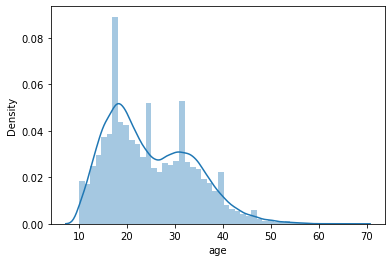

In [513]:
sns.distplot(train_data.age)

<AxesSubplot:xlabel='age'>

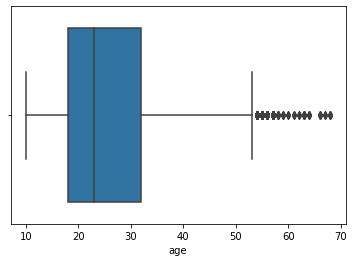

In [514]:
sns.boxplot(train_data.age)

#### `removed outlirs`

In [515]:
q1 = np.percentile(train_data.age,25)
q3 = np.percentile(train_data.age,75)
train_data = train_data[train_data.age <= (q3 + 1.5 * (q3-q1))]

### `Followerrs`

<AxesSubplot:xlabel='followers', ylabel='Density'>

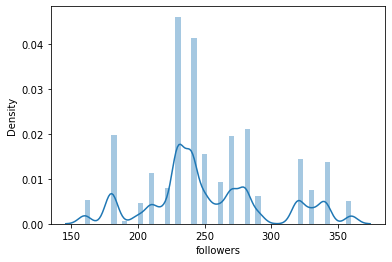

In [516]:
sns.distplot(train_data.followers)

<AxesSubplot:xlabel='followers'>

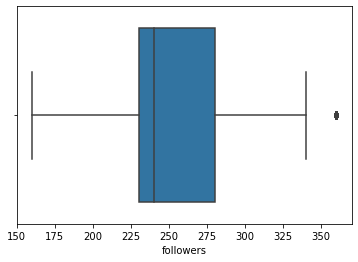

In [517]:
sns.boxplot(train_data.followers)

### `Views`

<AxesSubplot:xlabel='views', ylabel='Density'>

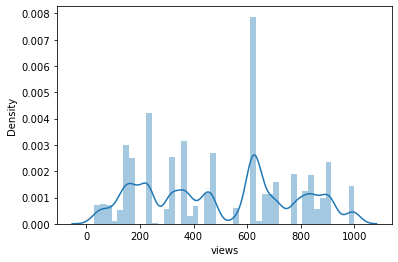

In [518]:
sns.distplot(train_data.views)

<AxesSubplot:xlabel='views'>

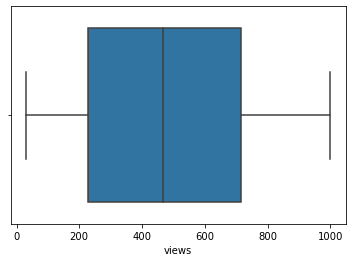

In [519]:
sns.boxplot(train_data.views)

In [520]:
train_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,Male,Student,180,1000,4.33
1,2,5304,32,132,14,Female,Student,330,714,1.79
2,3,1840,12,24,19,Male,Student,180,138,4.35
3,4,12597,23,112,19,Male,Student,220,613,3.77
4,5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [521]:
train_data[train_data.video_id == 128]['followers'].value_counts()

180    502
Name: followers, dtype: int64

In [522]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
train_data.gender = le.fit_transform(train_data.gender)
train_data.head()

,row_id,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
0,1,19990,37,128,24,1,Student,180,1000,4.33
1,2,5304,32,132,14,0,Student,330,714,1.79
2,3,1840,12,24,19,1,Student,180,138,4.35
3,4,12597,23,112,19,1,Student,220,613,3.77
4,5,13626,23,112,27,1,Working Professional,220,613,3.13


In [523]:
train_data = pd.get_dummies(train_data,columns=['profession'],drop_first=True)

In [524]:
train_data.head()

,row_id,user_id,category_id,video_id,age,gender,followers,views,engagement_score,profession_Student,profession_Working Professional
0,1,19990,37,128,24,1,180,1000,4.33,1,0
1,2,5304,32,132,14,0,330,714,1.79,1,0
2,3,1840,12,24,19,1,180,138,4.35,1,0
3,4,12597,23,112,19,1,220,613,3.77,1,0
4,5,13626,23,112,27,1,220,613,3.13,0,1


In [525]:
train_data.columns

Index(['row_id', 'user_id', 'category_id', 'video_id', 'age', 'gender',
       'followers', 'views', 'engagement_score', 'profession_Student',
       'profession_Working Professional'],
      dtype='object')

In [526]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
train_data[['age','followers','views','category_id','video_id']] = sc.fit_transform(train_data[['age','followers','views','category_id','video_id']])

In [527]:
train_data.head()

,row_id,user_id,category_id,video_id,age,gender,followers,views,engagement_score,profession_Student,profession_Working Professional
0,1,19990,1.599191,1.037288,-0.087507,1,-1.571883,1.850376,4.33,1,0
1,2,5304,1.171001,1.119815,-1.220509,0,1.681840,0.785633,1.79,1,0
2,3,1840,-0.541758,-1.108410,-0.654008,1,-1.571883,-1.358744,4.35,1,0
3,4,12597,0.400260,0.707181,-0.654008,1,-0.704224,0.409623,3.77,1,0
4,5,13626,0.400260,0.707181,0.252394,1,-0.704224,0.409623,3.13,0,1


### `X and y`

In [528]:
X_train = train_data.drop(['row_id','user_id','engagement_score'],axis=1)
y_train = train_data['engagement_score']

## `Model Building and Testing`

In [529]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [530]:
from sklearn.model_selection import train_test_split
X_train,X_valid, y_train, y_valid = train_test_split(X_train,y_train,test_size=0.20,random_state=42)

In [531]:
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

### On Train data

In [536]:
y_pred = lr.predict(X_train)

In [537]:
print(r2_score(y_train,y_pred)*100)
print(np.sqrt(mean_squared_error(y_train,y_pred)))

27.491839545557795
0.7364497747818076


### On Valid data

In [538]:
y_pred = lr.predict(X_valid)

In [539]:
print(r2_score(y_valid,y_pred)*100)
print(np.sqrt(mean_squared_error(y_valid,y_pred)))

26.147480867271998
0.736558494962676
